# Other photo manipulations (working)

## Import class definitions

In [946]:
from matplotlib import pyplot as plt

from pointillism import pointillize, pointillizeStack, pointillizePile
%run pointillism.py

## Abstract dots

In [947]:
%run pointillism.py

In [985]:
n=10e2
constant=0.03
power=2
min_size=0.001

size = [7800,3800]

In [986]:
point = pointillize(location='images/IMG_0060.jpg', debug=True, plot_coverage=True, use_coverage=True, use_complexity=False)
point.crop_Y(size, True)
point.plotRandomPointsComplexity(n=n, constant=constant, power=power, min_size=min_size)  

plotRandomPointsComplexity: done...took 5.18 sec


In [987]:
point.save_out(location='composite/', prefix='1 ', suffix='composite')

images/IMG_0060.jpg


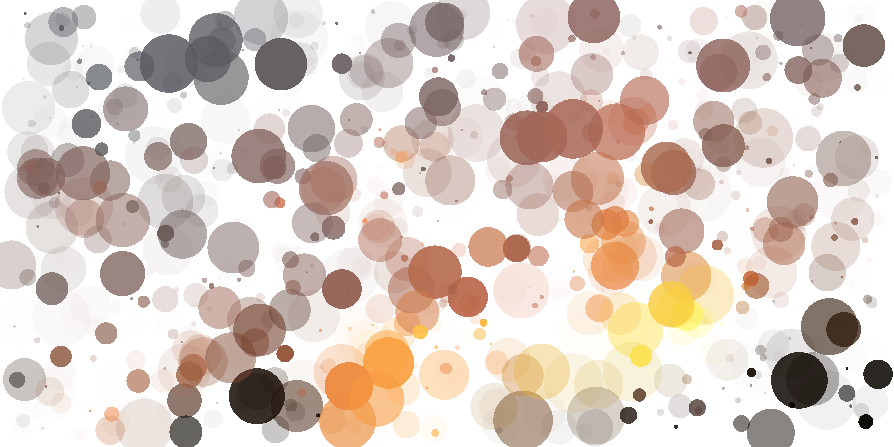

In [988]:
point.display()

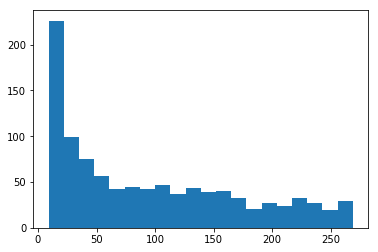

In [952]:
plt.hist(point.radius_list, bins=20)
plt.show()

In [953]:
point = pointillize(location='images/pfieffer.jpg', debug=True, plot_coverage=True, use_coverage=True, use_complexity=False)
point.crop_Y(size, True)
point.plotRandomPointsComplexity(n=n, constant=constant, power=power, min_size=min_size)  

plotRandomPointsComplexity: done...took 4.83 sec


In [954]:
point.save_out(location='composite/', prefix='2 ', suffix='composite')

In [955]:
#point.display()

In [956]:
point = pointillize(location='images/IMG_0289.jpg', debug=True, plot_coverage=True, use_coverage=True, use_complexity=False)
point.crop_Y(size, True)
point.plotRandomPointsComplexity(n=n, constant=constant, power=power, min_size=min_size)  

plotRandomPointsComplexity: done...took 4.47 sec


In [957]:
point.save_out(location='composite/', prefix='3 ', suffix='composite')

In [958]:
#point.display()

In [959]:
point = pointillize(location='images/IMG_0290.jpg', debug=True, plot_coverage=True, use_coverage=True, use_complexity=False)
point.crop_Y(size, True)
point.plotRandomPointsComplexity(n=n, constant=constant, power=power, min_size=min_size)  

plotRandomPointsComplexity: done...took 4.41 sec


In [960]:
point.save_out(location='composite/', prefix='4 ', suffix='composite')

In [961]:
#point.display()

In [989]:
size = (4000,8000)
n = 4
border = 100
canvas = Image.new('RGB', (size[0]*4 + border*(n+1),size[1] + border*2), color='grey')
location = 'composite/'

for i,im in enumerate(os.listdir(location)):
    to_paste = Image.open(location + im)
    to_paste = to_paste.rotate(90, expand=True)
    canvas.paste(to_paste, (border+i*(size[0]+border),border))

In [990]:
canvas.save('canvas.jpg')

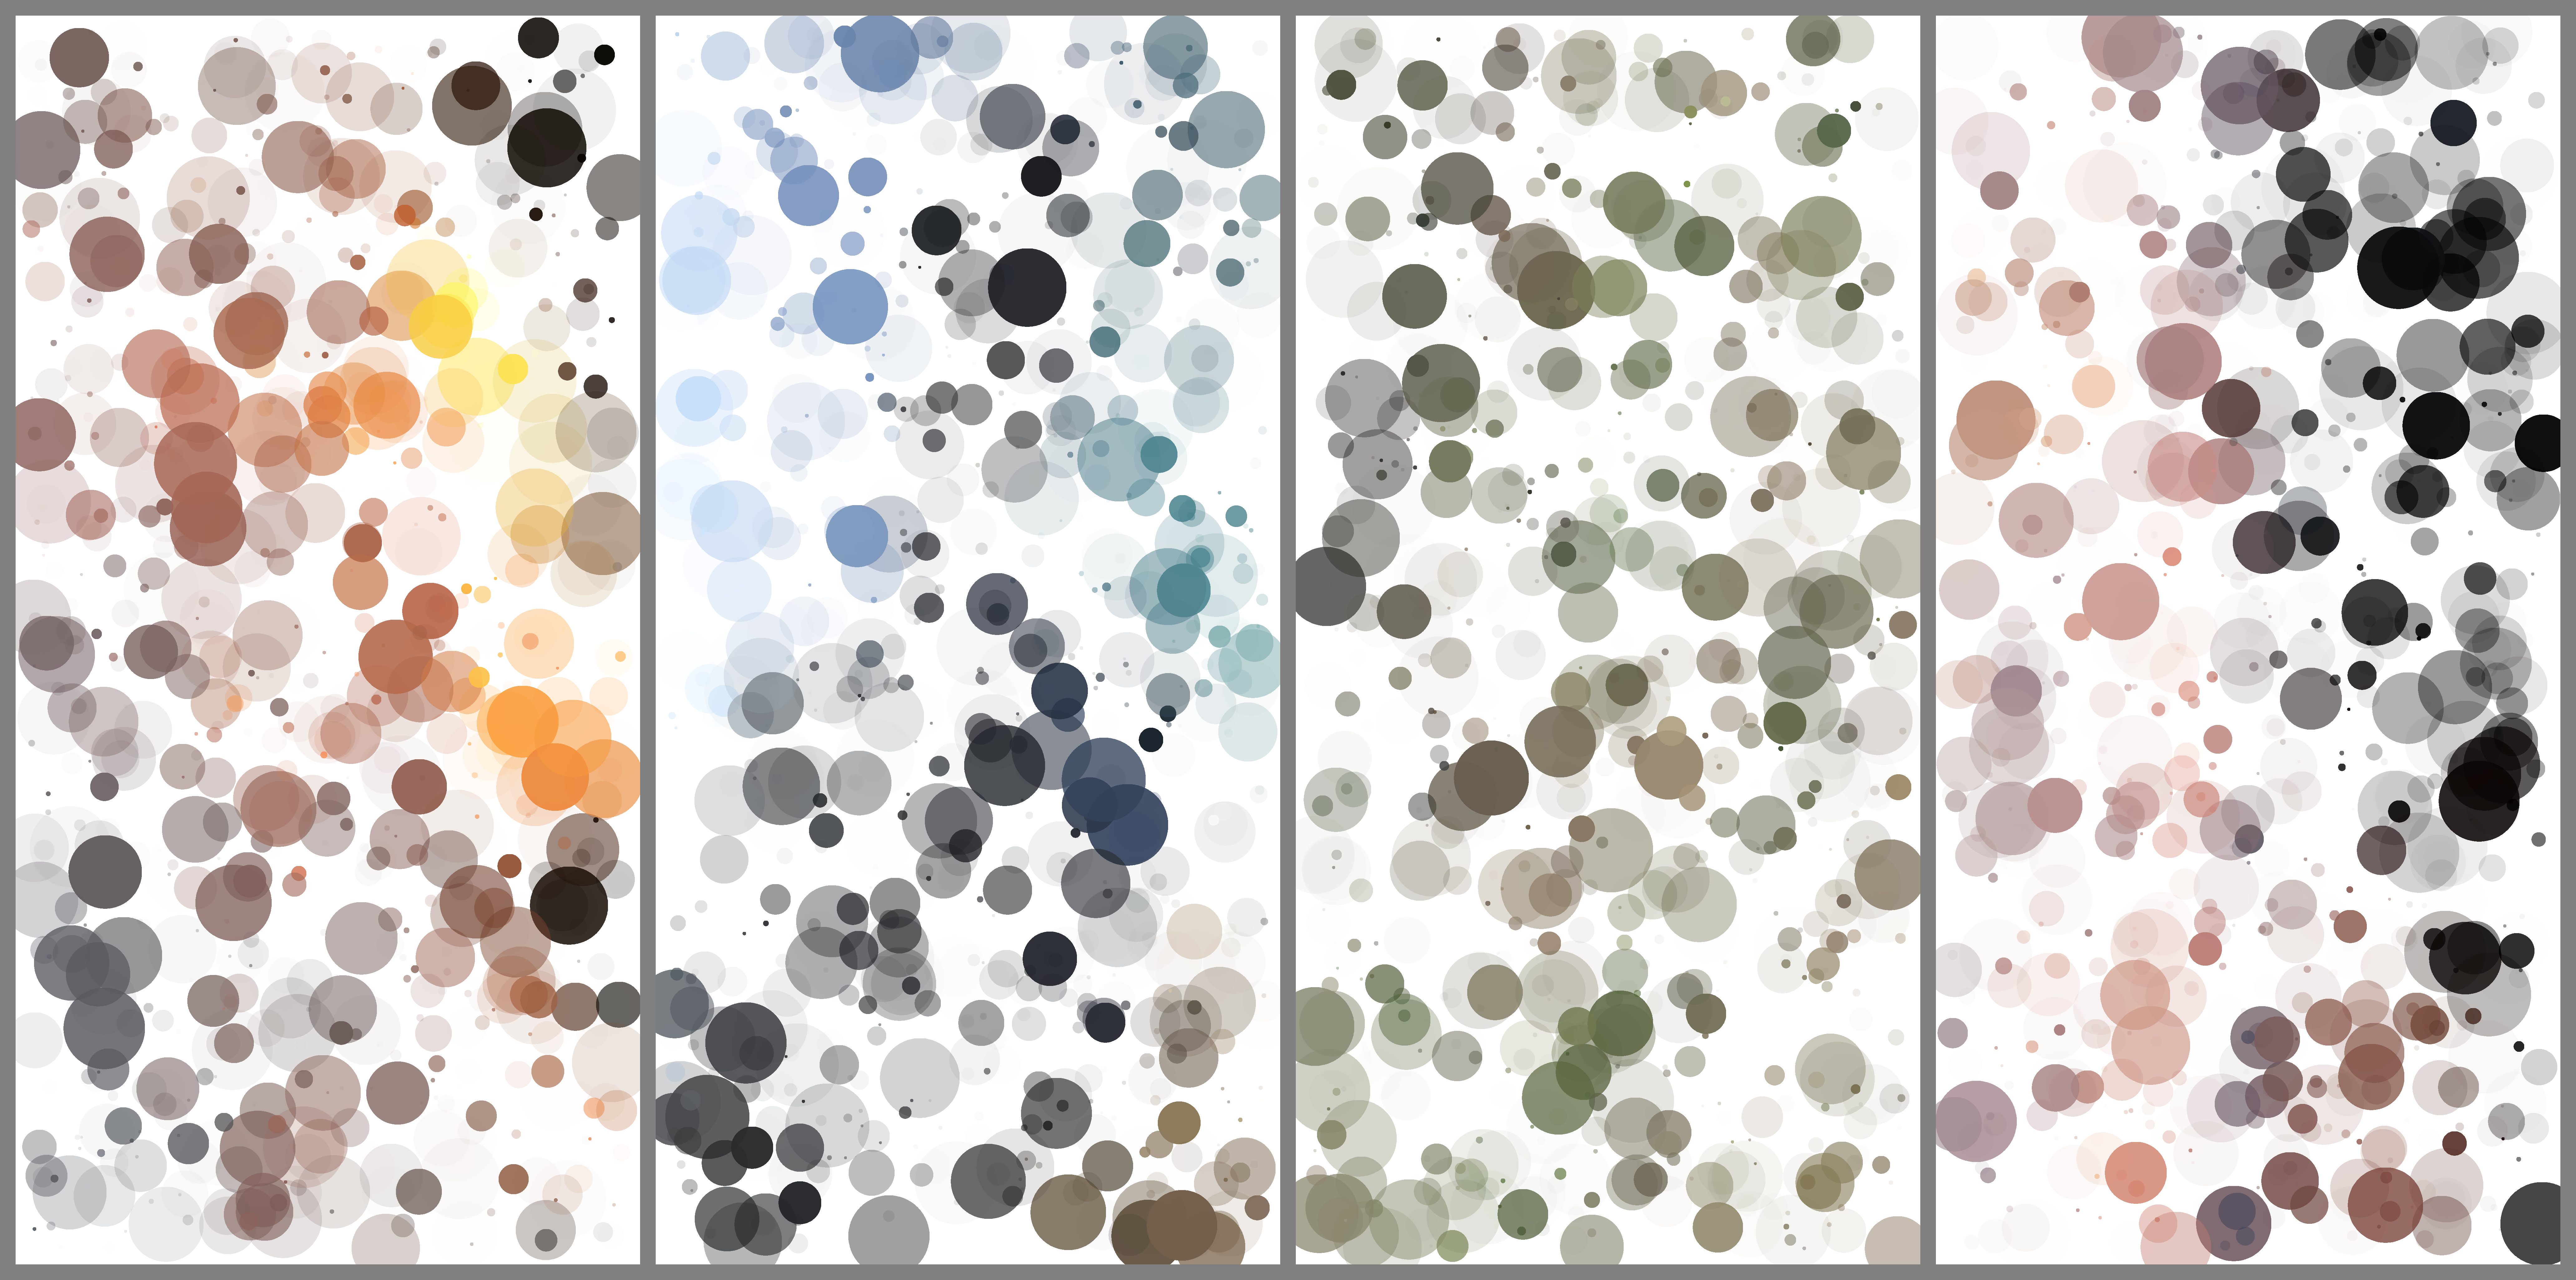

In [991]:
canvas.resize([size//2 for size in canvas.size])

## Sobel

In [759]:
# Create instance on directory or filename
point = pointillize(location='images/IMG_3197.jpg', debug = True, border = 0)

# Crop
point.crop_Y([1000,500], True)

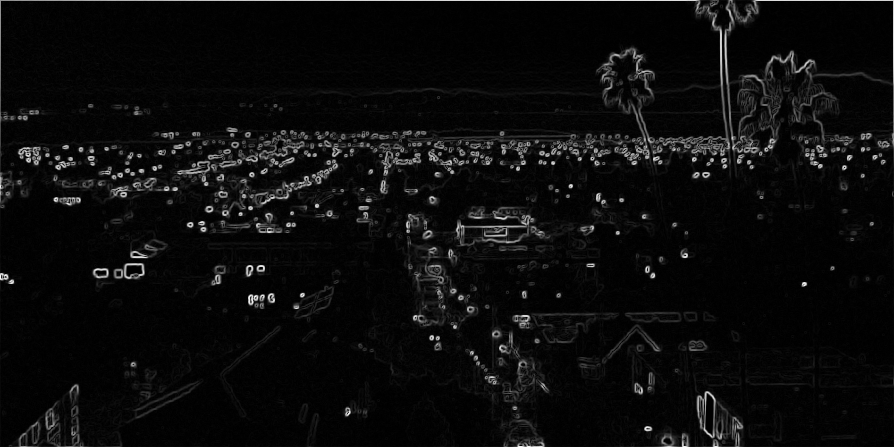

In [760]:
from scipy import ndimage
im = point.array[:,:,0].copy()
sx = ndimage.sobel(im, axis=0, mode='constant')
sy = ndimage.sobel(im, axis=1, mode='constant')
sob = np.hypot(sx, sy)
Image.fromarray((sob/sob.max()*255).astype('uint8'))

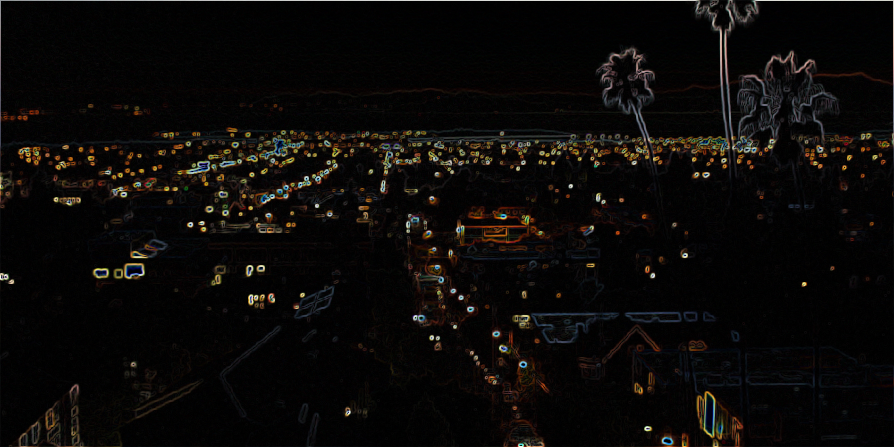

In [761]:
from scipy import ndimage
array_list = []
for color in range(0,3):
    im = point.array[:,:,color].copy()
    sx = ndimage.sobel(im, axis=0, mode='constant')
    sy = ndimage.sobel(im, axis=1, mode='constant')
    sob = np.hypot(sx, sy)
    array_list.append(sob)
stacked = np.dstack(array_list)
Image.fromarray((stacked/stacked.max()*255).astype('uint8'))

## Guassian

In [762]:
# Create instance on directory or filename
point = pointillize(location='images/IMG_0368.jpg', debug = True, border = 0)

# Crop
point.crop_Y([1000,500], False)

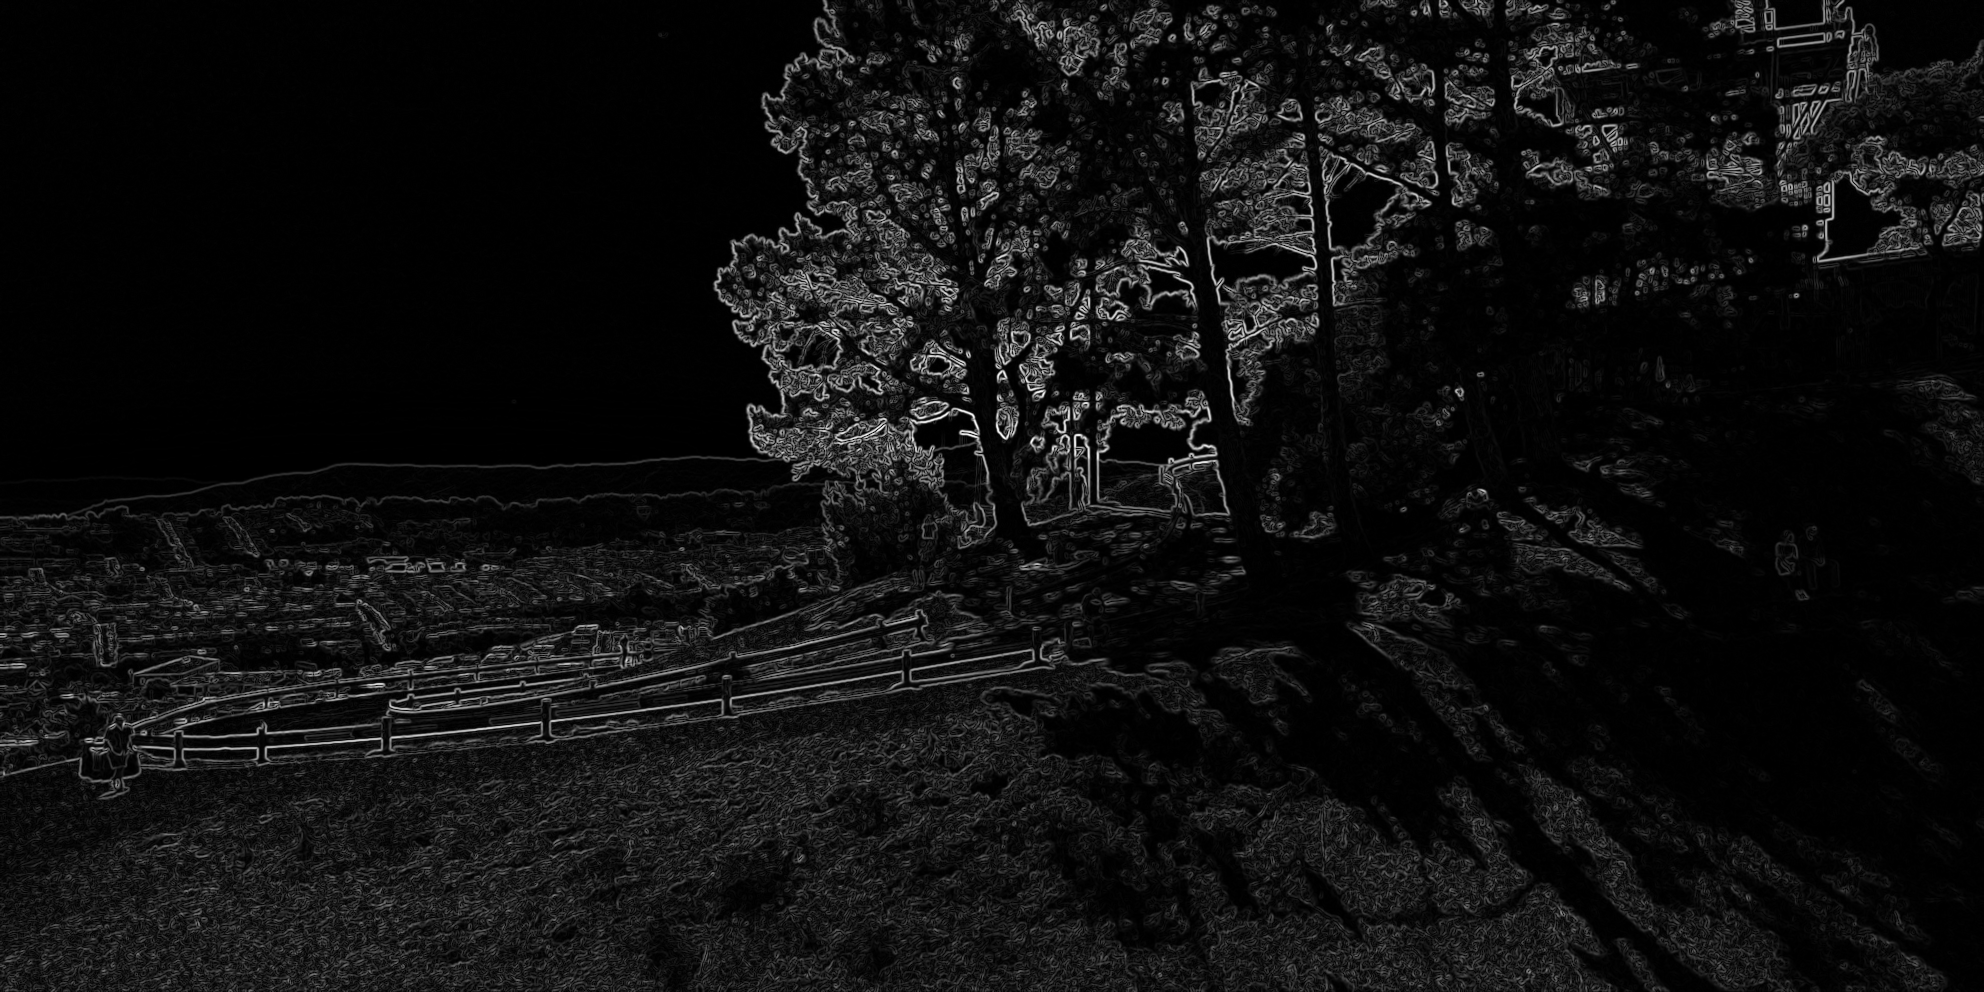

In [763]:
im = point.array.sum(axis=2).copy()
sob = ndimage.gaussian_gradient_magnitude(im, sigma=1)
Image.fromarray((sob/sob.max()*255).astype('uint8'))

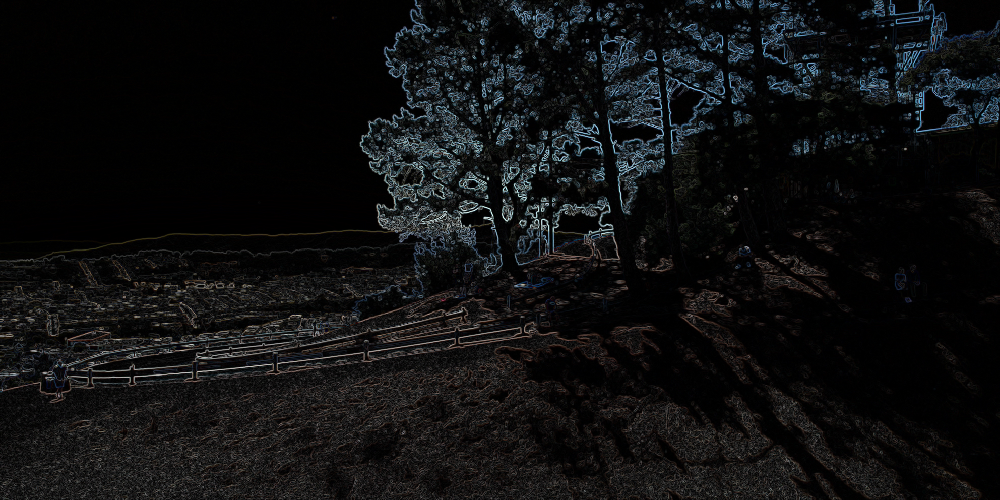

In [764]:
from scipy import ndimage
array_list = []
for color in range(0,3):
    im = point.array[:,:,color].copy()
    sob = ndimage.gaussian_gradient_magnitude(im, sigma=1)
    array_list.append(sob)
stacked = np.dstack(array_list)
Image.fromarray((stacked/stacked.max()*255).astype('uint8')).resize((1000,500))

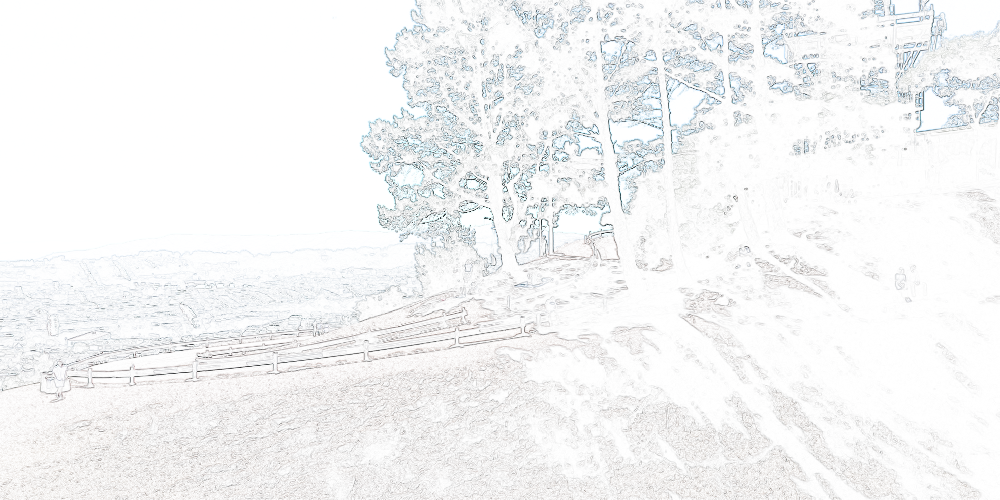

In [765]:
im = point.array.sum(axis=2).copy()
sob = ndimage.gaussian_gradient_magnitude(im, sigma=1)
image = point.image.copy()
out = Image.fromarray((sob/sob.max()*255).astype('uint8'))
out = out.resize(image.size)
image.putalpha(out)
white = Image.new(size=image.size, color=(255,255,255), mode='RGB')
white.paste(image, (0,0), image)
#white.save('etc/DJI_borders.jpg')
white.resize((1000,500))

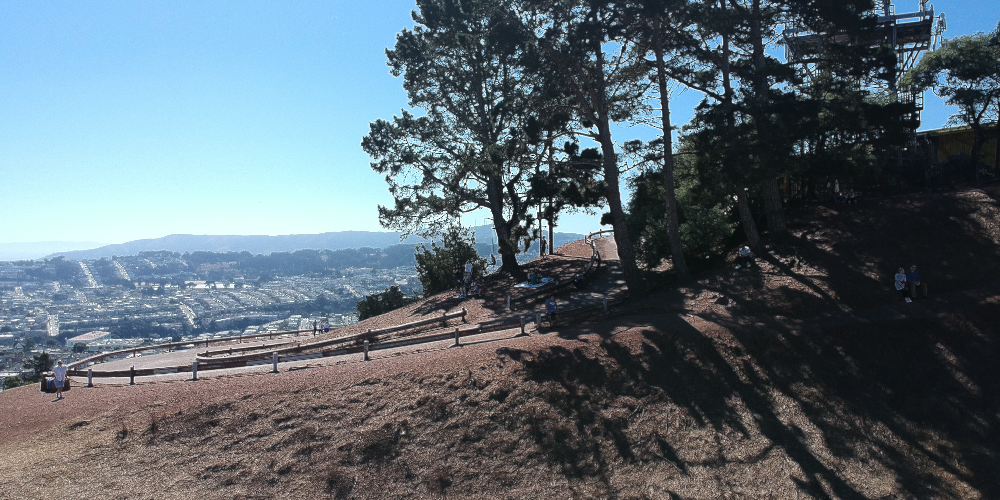

In [766]:
from PIL import ImageOps
im = point.array.sum(axis=2).copy()
sob = ndimage.gaussian_gradient_magnitude(im, sigma=1)
image = point.image.copy()
out = Image.fromarray((sob/sob.max()*255).astype('uint8'))
out = ImageOps.invert(out)
out = out.resize(image.size)
image.putalpha(out)
white = Image.new(size=image.size, color=(255,255,255), mode='RGB')
white.paste(image, (0,0), image)
#white.save('etc/DJI_noborders.jpg')
white.resize((1000,500))
